In [ ]:
#v2: data anginnya pake sin cos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, classification_report, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

In [ ]:
# WINDOW_SIZE = 7
# HORIZON = 7

# scaler = None
# scaled_data = None
# training_data_len = None

In [ ]:
data

,pm10,pm25,so2,co,o3,no2,Tavg,RH_avg,RR,ss,ff_avg,DDD_CAR_cos,DDD_CAR_sin
tanggal,,,,,,,,,,,,,
2023-01-01,44.0,55.0,47.0,10.0,24.0,9.0,26.3,87.0,14.5,0.0,1.0,0.000000,0.000000
2023-01-02,32.0,43.0,52.0,9.0,24.0,8.0,27.5,81.0,31.5,0.7,2.0,0.707107,-0.707107
2023-01-03,31.0,35.0,49.0,9.0,12.0,7.0,26.6,82.0,0.5,0.0,1.0,0.000000,0.000000
2023-01-04,30.0,47.0,53.0,11.0,15.0,9.0,26.4,86.0,2.4,2.1,1.0,0.000000,0.000000
2023-01-05,38.0,50.0,50.0,13.0,26.0,11.0,27.4,83.0,35.3,4.9,2.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,54.0,78.0,19.0,23.0,34.0,31.0,30.1,71.0,0.0,8.0,2.0,0.000000,0.000000
2024-10-28,60.0,83.0,10.0,26.0,37.0,36.0,30.2,67.0,0.0,8.0,1.0,0.000000,0.000000
2024-10-29,59.0,75.0,11.0,28.0,29.0,41.0,30.8,69.0,0.0,0.6,1.0,0.000000,0.000000


In [ ]:
data = pd.read_csv('/content/preprocessed_main_data_dki1_kemayoran_v2.csv', sep=';')
# data2 = pd.read_csv('/content/preprocessed_main_data_dki1_kemayoran.csv', sep=',')
data = data.set_index('tanggal')
# data2 = data2.set_index('tanggal')
data = data[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR_cos', 'DDD_CAR_sin']]
# data2 = data2[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'Tavg_km', 'RH_avg_km', 'ss_km', 'ff_avg_km', 'DDD_CAR_km']]

In [ ]:
data

,pm10,pm25,so2,co,o3,no2,Tavg,RH_avg,RR,ss,ff_avg,DDD_CAR_cos,DDD_CAR_sin
tanggal,,,,,,,,,,,,,
2023-01-01,44.0,55.0,47.0,10.0,24.0,9.0,26.3,87.0,14.5,0.0,1.0,0.000000,0.000000
2023-01-02,32.0,43.0,52.0,9.0,24.0,8.0,27.5,81.0,31.5,0.7,2.0,0.707107,-0.707107
2023-01-03,31.0,35.0,49.0,9.0,12.0,7.0,26.6,82.0,0.5,0.0,1.0,0.000000,0.000000
2023-01-04,30.0,47.0,53.0,11.0,15.0,9.0,26.4,86.0,2.4,2.1,1.0,0.000000,0.000000
2023-01-05,38.0,50.0,50.0,13.0,26.0,11.0,27.4,83.0,35.3,4.9,2.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,54.0,78.0,19.0,23.0,34.0,31.0,30.1,71.0,0.0,8.0,2.0,0.000000,0.000000
2024-10-28,60.0,83.0,10.0,26.0,37.0,36.0,30.2,67.0,0.0,8.0,1.0,0.000000,0.000000
2024-10-29,59.0,75.0,11.0,28.0,29.0,41.0,30.8,69.0,0.0,0.6,1.0,0.000000,0.000000


In [ ]:
data.corr()

,pm10,pm25,so2,co,o3,no2,Tavg,RH_avg,RR,ss,ff_avg,DDD_CAR_cos,DDD_CAR_sin
pm10,1.000000,0.937326,-0.182407,0.279077,0.471136,0.534692,0.349440,-0.348901,-0.345516,0.316595,-0.196871,0.143997,0.291253
pm25,0.937326,1.000000,-0.126425,0.261990,0.469812,0.543937,0.379819,-0.382908,-0.347780,0.349153,-0.179953,0.125633,0.295375
so2,-0.182407,-0.126425,1.000000,-0.764552,-0.104414,-0.405053,-0.212365,0.087005,0.074924,-0.075730,-0.042932,-0.309976,-0.153689
co,0.279077,0.261990,-0.764552,1.000000,0.073549,0.597727,0.125848,-0.083578,-0.046299,0.085850,-0.014824,0.384113,0.155008
o3,0.471136,0.469812,-0.104414,0.073549,1.000000,0.224796,0.224766,-0.194315,-0.074981,0.260344,-0.118591,0.122256,0.220245
no2,0.534692,0.543937,-0.405053,0.597727,0.224796,1.000000,0.120803,-0.024527,-0.028732,0.086067,-0.164506,0.217283,0.184317
Tavg,0.349440,0.379819,-0.212365,0.125848,0.224766,0.120803,1.000000,-0.702893,-0.443083,0.331984,0.153355,0.108142,0.080482
RH_avg,-0.348901,-0.382908,0.087005,-0.083578,-0.194315,-0.024527,-0.702893,1.000000,0.474458,-0.465598,-0.187293,-0.192372,-0.045085
RR,-0.345516,-0.347780,0.074924,-0.046299,-0.074981,-0.028732,-0.443083,0.474458,1.000000,-0.249251,-0.120878,-0.061704,-0.067271
ss,0.316595,0.349153,-0.075730,0.085850,0.260344,0.086067,0.331984,-0.465598,-0.249251,1.000000,0.010834,0.203692,0.104789


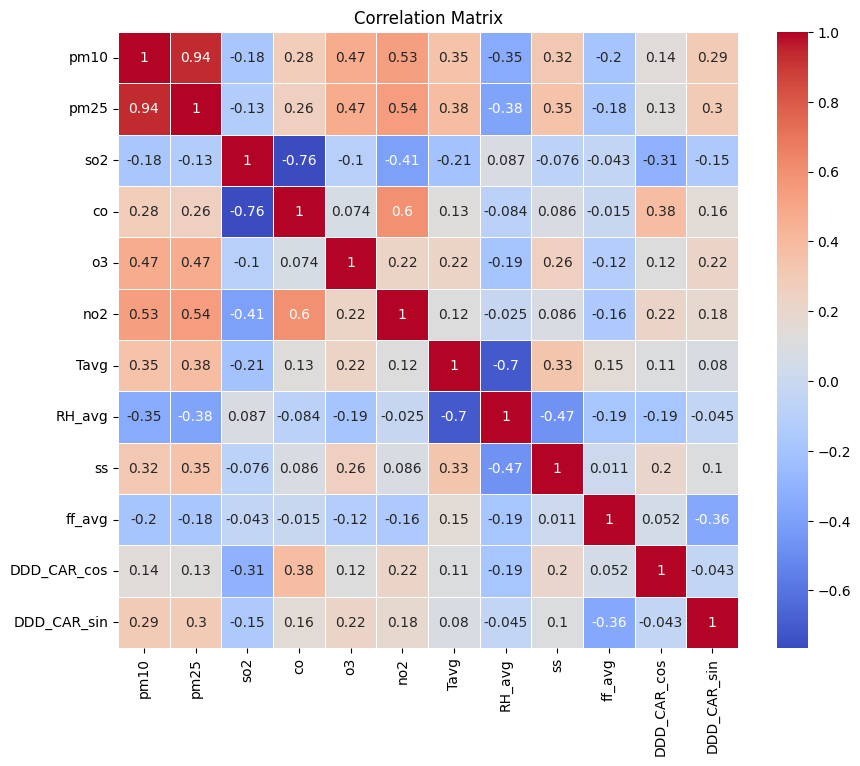

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = data.corr(method='pearson')
print(correlation_matrix)

                 pm10      pm25       so2        co        o3       no2  \
pm10         1.000000  0.937326 -0.182407  0.279077  0.471136  0.534692   
pm25         0.937326  1.000000 -0.126425  0.261990  0.469812  0.543937   
so2         -0.182407 -0.126425  1.000000 -0.764552 -0.104414 -0.405053   
co           0.279077  0.261990 -0.764552  1.000000  0.073549  0.597727   
o3           0.471136  0.469812 -0.104414  0.073549  1.000000  0.224796   
no2          0.534692  0.543937 -0.405053  0.597727  0.224796  1.000000   
Tavg         0.349440  0.379819 -0.212365  0.125848  0.224766  0.120803   
RH_avg      -0.348901 -0.382908  0.087005 -0.083578 -0.194315 -0.024527   
RR          -0.345516 -0.347780  0.074924 -0.046299 -0.074981 -0.028732   
ss           0.316595  0.349153 -0.075730  0.085850  0.260344  0.086067   
ff_avg      -0.196871 -0.179953 -0.042932 -0.014824 -0.118591 -0.164506   
DDD_CAR_cos  0.143997  0.125633 -0.309976  0.384113  0.122256  0.217283   
DDD_CAR_sin  0.291253  0.

<ipython-input-59-3275105028>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)


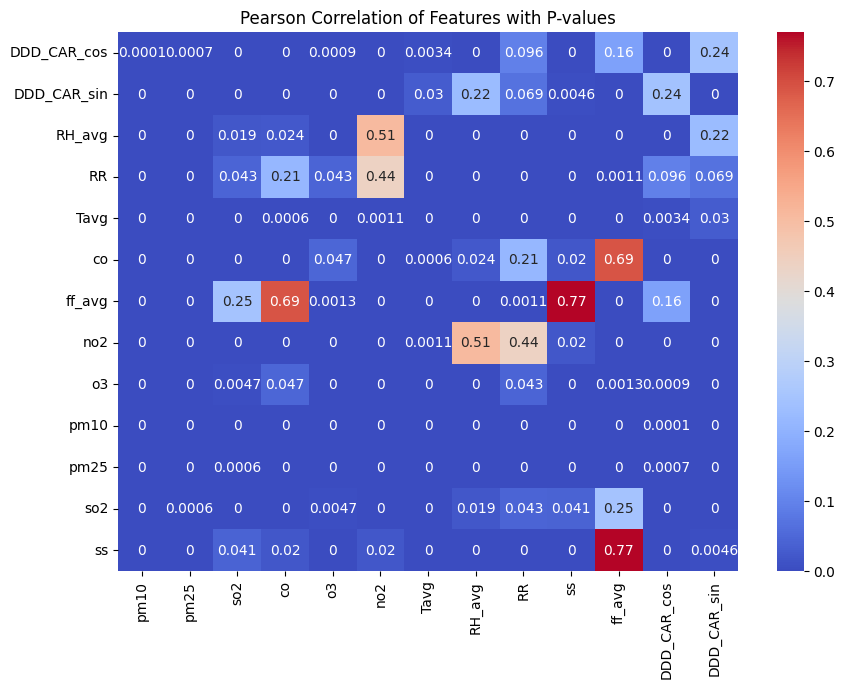

In [ ]:
# prompt: make a heatmap from `data` using scipy.stats.pearsonr with pvalue range from 0-1 and alpha = 0.05

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

pvalues = calculate_pvalues(data)

pvalues = pvalues.astype(float)

# Plotting heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pvalues, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation of Features with P-values")
plt.show()

In [ ]:
pvalues

,pm10,pm25,so2,co,o3,no2,Tavg,RH_avg,RR,ss,ff_avg,DDD_CAR_cos,DDD_CAR_sin
DDD_CAR_cos,0.0001,0.0007,0.0000,0.0000,0.0009,0.0000,0.0034,0.0000,0.0955,0.0000,0.1603,0.0000,0.2424
DDD_CAR_sin,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0296,0.2234,0.0691,0.0046,0.0000,0.2424,0.0000
RH_avg,0.0000,0.0000,0.0186,0.0238,0.0000,0.5079,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2234
RR,0.0000,0.0000,0.0429,0.2112,0.0427,0.4380,0.0000,0.0000,0.0000,0.0000,0.0011,0.0955,0.0691
Tavg,0.0000,0.0000,0.0000,0.0006,0.0000,0.0011,0.0000,0.0000,0.0000,0.0000,0.0000,0.0034,0.0296
co,0.0000,0.0000,0.0000,0.0000,0.0468,0.0000,0.0006,0.0238,0.2112,0.0203,0.6891,0.0000,0.0000
ff_avg,0.0000,0.0000,0.2463,0.6891,0.0013,0.0000,0.0000,0.0000,0.0011,0.7700,0.0000,0.1603,0.0000
no2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.5079,0.4380,0.0199,0.0000,0.0000,0.0000
o3,0.0000,0.0000,0.0047,0.0468,0.0000,0.0000,0.0000,0.0000,0.0427,0.0000,0.0013,0.0009,0.0000
pm10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000


# Di normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns=['pm25'])  # Hanya fitur
y = data['pm25']                 # Target

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

results = []

for col in X_normalized.columns:
    model = LinearRegression()
    model.fit(X_normalized[[col]], y)
    y_pred = model.predict(X_normalized[[col]])
    r2 = r2_score(y, y_pred)
    results.append((col, model.coef_[0], r2))

# Urutkan berdasarkan R² tertinggi
feature_ranking = sorted(results, key=lambda x: abs(x[2]), reverse=True)

for i, (name, coef, r2) in enumerate(feature_ranking, start=1):
    print(f"{i}. Feature: {name}, Coef: {coef:.4f}, R²: {r2:.4f}")

1. Feature: pm10, Coef: 89.8701, R²: 0.8786
2. Feature: no2, Coef: 92.8910, R²: 0.2959
3. Feature: o3, Coef: 80.3422, R²: 0.2207
4. Feature: RH_avg, Coef: -44.7082, R²: 0.1466
5. Feature: Tavg, Coef: 48.7820, R²: 0.1443
6. Feature: ss, Coef: 26.6631, R²: 0.1219
7. Feature: RR, Coef: -68.1670, R²: 0.1210
8. Feature: DDD_CAR_sin, Coef: 52.6836, R²: 0.0872
9. Feature: co, Coef: 23.1870, R²: 0.0686
10. Feature: ff_avg, Coef: -18.8593, R²: 0.0324
11. Feature: so2, Coef: -15.8845, R²: 0.0160
12. Feature: DDD_CAR_cos, Coef: 16.7197, R²: 0.0158


In [ ]:
from sklearn.feature_selection import RFE

data_temp = data.drop(columns=['pm25'])

# Mendefinisikan Model
rfe = RFE(estimator=LinearRegression())
# Training ke fitur dan target
rfe.fit(data_temp, y)
# Transform ke fitur tanpa target
X_train_sub = rfe.transform(data_temp)
# Mendapatkan Ranking yang dihasilkan oleh uji RFE
feature_rankings = rfe.ranking_
# Melihat fitur dan ranking
for feature, ranking in zip(data_temp.columns, feature_rankings):
  print(f"Feature: {feature}, Ranking: {ranking}")

Feature: pm10, Ranking: 1
Feature: so2, Ranking: 3
Feature: co, Ranking: 4
Feature: o3, Ranking: 6
Feature: no2, Ranking: 1
Feature: Tavg, Ranking: 1
Feature: RH_avg, Ranking: 5
Feature: RR, Ranking: 7
Feature: ss, Ranking: 1
Feature: ff_avg, Ranking: 2
Feature: DDD_CAR_cos, Ranking: 1
Feature: DDD_CAR_sin, Ranking: 1


# Data Splitting

In [ ]:
targets = ['pm25_dki1', 'pm25_dki2', 'pm25_dki3', 'pm25_dki4', 'pm25_dki5']
X = data_scaled.drop(columns=targets)
y = data_scaled[targets]

training_data_len = math.ceil(len(data_scaled)* 0.8)
x_train = X[:training_data_len]
y_train = y[:training_data_len]

# Val set
val_test_len = len(X[training_data_len:])
val_len = math.ceil(val_test_len/2)
x_val = X[training_data_len: training_data_len+val_len]
y_val = y[training_data_len: training_data_len+val_len]

# Test set
x_test = X[training_data_len+val_len: ]
y_test = y[training_data_len+val_len: ]

# Define Evaluation

In [ ]:

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"MAPE : {mape}")

    return

# Multiple Linear Regression

## DKI 1

In [ ]:
dki1_features = [
  'pm10_dki1'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 1 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 1 features) in DKI 1
MAE  : 0.0684272066952156
MSE  : 0.010923664396305193
MAPE : 21637195586910.926


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 2 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 2 features) in DKI 1
MAE  : 0.06834047154718215
MSE  : 0.01037195967400888
MAPE : 20699287470217.49


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2', 'pm10_dki3'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 1
MAE  : 0.06866725862298967
MSE  : 0.010521605819487054
MAPE : 20397733578138.65


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 4 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 4 features) in DKI 1
MAE  : 0.0780248303564583
MSE  : 0.012188095197477076
MAPE : 20209682243268.09


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 5 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 1
MAE  : 0.07810598928854573
MSE  : 0.012185275459891674
MAPE : 20175718334081.297


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'o3_dki2', 'o3_dki4', 'no2_dki1'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 10 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 10 features) in DKI 1
MAE  : 0.07351024056663412
MSE  : 0.011066006116026464
MAPE : 19908534527244.76


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'o3_dki2', 'o3_dki4', 'no2_dki1',
  'co_dki4', 'o3_dki5', 'no2_dki4', 'co_dki5', 'o3_dki1'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 15 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 15 features) in DKI 1
MAE  : 0.07276898328921791
MSE  : 0.01054416833649806
MAPE : 20347206665555.938


In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'o3_dki2', 'o3_dki4', 'no2_dki1',
  'co_dki4', 'o3_dki5', 'no2_dki4', 'co_dki5', 'o3_dki1',
  'DDD_CAR_tp', 'RH_avg_tp', 'Tavg_tp', 'RH_avg_km', 'Tavg_km',
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 20 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 20 features) in DKI 1
MAE  : 0.074172865160869
MSE  : 0.010475166105682146
MAPE : 20074939761658.387


In [ ]:
dki1_all_features = [
    'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4', 'pm10_dki5',
    'no2_dki5', 'o3_dki3', 'o3_dki2', 'o3_dki4', 'no2_dki1',
    'co_dki4', 'o3_dki5', 'no2_dki4', 'co_dki5', 'o3_dki1',
    'DDD_CAR_tp', 'RH_avg_tp', 'Tavg_tp', 'RH_avg_km', 'Tavg_km',
    'ss_tp', 'ss_km', 'RR_km', 'ff_avg_tp', 'RR_tp',
    'co_dki1', 'so2_dki3', 'DDD_CAR_km', 'so2_dki5', 'ff_avg_km',
    'co_dki3', 'so2_dki1', 'no2_dki2', 'so2_dki2', 'season',
    'holiday', 'no2_dki3', 'co_dki2', 'so2_dki4'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

OLS(y_test['pm25_dki1'], x_test[dki1_all_features]).fit().summary()

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 1
MAE  : 0.07440985816145136
MSE  : 0.010040592442165493
MAPE : 15997095476167.895


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki1   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              67.16
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    3.39e-23
Time:                        16:10:58   Log-Likelihood:                          102.89
No. Observations:                  73   AIC:                                     -127.8
Df Residuals:                      34   BIC:                                     -38.45
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki1      0.9367      0.259      3.618      0.001       0.411       1.463
pm10_dki2     -0.2222      0.185     -1.202      0.238      -0.598       0.153
pm10_dki3     -0.0800      0.273     -0.293      0.771      -0.634       0.474
pm10_dki4     -0.3323      0.273     -1.216      0.232      -0.888       0.223
pm10_dki5      0.1214      0.181      0.671      0.507      -0.247       0.489
no2_dki5       0.1204      0.347      0.347      0.731      -0.585       0.826
o3_dki3        0.1865      0.292      0.639      0.527      -0.406       0.779
o3_dki2       -0.1459      0.268     -0.544      0.590      -0.691       0.400
o3_dki4       -0.1915      0.214     -0.895      0.377      -0.626       0.243
no2_dki1      -0.2745      0.232     -1.183      0.245      -0.746       0.197
co_dki4        0.2319      0.285      0.814      0.421      -0.347       0.811
o3_dki5        0.1324      0.285      0.464      0.646      -0.447       0.712
no2_dki4       0.2407      0.207      1.160      0.254      -0.181       0.662
co_dki5        0.1356      0.337      0.403      0.690      -0.548       0.820
o3_dki1        0.1498      0.169      0.885      0.383      -0.194       0.494
DDD_CAR_tp     0.0551      0.063      0.880      0.385      -0.072       0.182
RH_avg_tp     -0.1822      0.291     -0.626      0.536      -0.774       0.410
Tavg_tp        0.4229      0.372      1.137      0.263      -0.333       1.179
RH_avg_km     -0.0173      0.316     -0.055      0.957      -0.659       0.625
Tavg_km       -0.2483      0.419     -0.592      0.558      -1.101       0.604
ss_tp          0.1231      0.112      1.095      0.281      -0.105       0.352
ss_km          0.0196      0.119      0.165      0.870      -0.221       0.261
RR_km         -0.1080      0.180     -0.601      0.552      -0.473       0.257
ff_avg_tp     -0.2764      0.139     -1.984      0.055      -0.560       0.007
RR_tp          0.2418      0.186      1.299      0.203      -0.137       0.620
co_dki1       -0.1897      0.295     -0.642      0.525      -0.790       0.411
so2_dki3       0.6879      0.424      1.624      0.114      -0.173       1.549
DDD_CAR_km    -0.1243      0.059     -2.124      0.041      -0.243      -0.005
so2_dki5      -0.1353      0.140     -0.964      0.342      -0.420       0.150
ff_avg_km      0.1609      0.099      1.618      0.115      -0.041       0.363
co_dki3        0.7788      0.809      0.962      0.343      -0.866       2.423
so2_dki1       0.3562      0.256      1.390      0.174      -0.165       0.877
no2_dki2      -0.0745      0.235     -0.317      0.753      -0.551       0.402
so2_dki2       0.0610      0.114      0.535      0.596      -0.171       0.293
season        -0.0245      0.033     -0.751      0.458      -

## DKI 2

In [ ]:
dki2_features = [
'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 1 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 1 features) in DKI 2
MAE  : 0.046746135527933615
MSE  : 0.003455833174951444
MAPE : 14211264106826.252


In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 2 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 2 features) in DKI 2
MAE  : 0.044994175736565646
MSE  : 0.0032259238134995853
MAPE : 13702798136248.98


In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1', 'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 2
MAE  : 0.04449259826065572
MSE  : 0.0035765579248423344
MAPE : 12837851453484.574


In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 4 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 4 features) in DKI 2
MAE  : 0.044724014772786314
MSE  : 0.003659062735574928
MAPE : 12925309420555.94


In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 5 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 2
MAE  : 0.04692947176980112
MSE  : 0.00414889994737875
MAPE : 13333192063415.656


In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 10 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 10 features) in DKI 2
MAE  : 0.05621290605843221
MSE  : 0.005354369207082139
MAPE : 13974624137842.092


In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 20 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 20 features) in DKI 2
MAE  : 0.06526626667243376
MSE  : 0.006118557234673911
MAPE : 13079717335938.5


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 21 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 21 features) in DKI 2
MAE  : 0.06483037576829567
MSE  : 0.006017380019531444
MAPE : 11911549580570.545


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 22 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 22 features) in DKI 2
MAE  : 0.06462371163903866
MSE  : 0.005992498168633178
MAPE : 12021126473233.791


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km', 'ss_km'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 23 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 23 features) in DKI 2
MAE  : 0.06477585390716634
MSE  : 0.006008512104030124
MAPE : 12057272894864.086


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km', 'ss_km', 'co_dki1'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 24 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 24 features) in DKI 2
MAE  : 0.06498213639461176
MSE  : 0.005809795335879637
MAPE : 10982374218572.553


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km', 'ss_km', 'co_dki1', 'RR_tp'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 25 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 25 features) in DKI 2
MAE  : 0.06504300747386521
MSE  : 0.005815002440018113
MAPE : 11002781485435.758


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km', 'ss_km', 'co_dki1', 'RR_tp',
  'ff_avg_tp', 'so2_dki3', 'DDD_CAR_km', 'so2_dki1', 'so2_dki5'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 30 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 30 features) in DKI 2
MAE  : 0.06804175742683129
MSE  : 0.005947412120032837
MAPE : 10896354059823.277


In [ ]:
dki2_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km', 'ss_km', 'co_dki1', 'RR_tp',
  'ff_avg_tp', 'so2_dki3', 'DDD_CAR_km', 'so2_dki1', 'so2_dki5',
  'no2_dki2', 'co_dki3', 'so2_dki2', 'ff_avg_km', 'no2_dki3',
  'co_dki2', 'so2_dki4', 'holiday', 'season'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 2
MAE  : 0.07762130485385844
MSE  : 0.007638138037881626
MAPE : 11858656423252.096


## DKI 3

In [ ]:
dki3_features = [
    'pm10_dki3'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 1 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 1 features) in DKI 3
MAE  : 0.08719585747394834
MSE  : 0.01803502971553283
MAPE : 54177494568156.54


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1',
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 2 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 2 features) in DKI 3
MAE  : 0.08450524416359863
MSE  : 0.017965629643695587
MAPE : 53290848415059.43


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 3
MAE  : 0.08589836718928391
MSE  : 0.018035707638981983
MAPE : 53005573135554.92


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 4 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 3
MAE  : 0.08658404864693682
MSE  : 0.018003698763266848
MAPE : 52356996479820.24


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 5 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 3
MAE  : 0.08335179440671998
MSE  : 0.0178890763929048
MAPE : 53361727354698.33


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
    'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 10 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 10 features) in DKI 3
MAE  : 0.09040804592245645
MSE  : 0.020580876763457812
MAPE : 57502482536480.86


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
    'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
    'co_dki5', 'no2_dki1'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 11 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 11 features) in DKI 3
MAE  : 0.0902307739663701
MSE  : 0.020426709061039678
MAPE : 57804870055065.15


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
    'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
    'co_dki5', 'no2_dki1', 'o3_dki4'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 13 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 13 features) in DKI 3
MAE  : 0.08581940109082059
MSE  : 0.018570269215917534
MAPE : 55026784503296.766


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
    'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
    'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 14 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 14 features) in DKI 3
MAE  : 0.08565422029534339
MSE  : 0.018524915322658556
MAPE : 54846444961483.49


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
    'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
    'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp', 'RR_km'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 15 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 15 features) in DKI 3
MAE  : 0.08739020824301738
MSE  : 0.01890179465117485
MAPE : 56614151055545.92


In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
    'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
    'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp', 'RR_km',
    'o3_dki5', 'ss_km', 'o3_dki1', 'ss_tp', 'RH_avg_tp'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 20 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 20 features) in DKI 3
MAE  : 0.08781450970268843
MSE  : 0.019179962271212363
MAPE : 58477431765277.64


In [ ]:
dki3_features = [
  'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
  'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
  'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp', 'RR_km',
  'o3_dki5', 'ss_km', 'o3_dki1', 'ss_tp', 'RH_avg_tp',
  'RR_tp', 'RH_avg_km', 'Tavg_tp', 'Tavg_km', 'DDD_CAR_km'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 25 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 25 features) in DKI 3
MAE  : 0.089443049266764
MSE  : 0.0199109773355145
MAPE : 60533290502797.37


In [ ]:
dki3_features = [
  'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
  'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
  'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp', 'RR_km',
  'o3_dki5', 'ss_km', 'o3_dki1', 'ss_tp', 'RH_avg_tp',
  'RR_tp', 'RH_avg_km', 'Tavg_tp', 'Tavg_km', 'DDD_CAR_km',
  'ff_avg_tp', 'so2_dki3', 'co_dki1', 'no2_dki2', 'co_dki3'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 30 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 30 features) in DKI 3
MAE  : 0.11544779270323399
MSE  : 0.025493372593377795
MAPE : 62639760345110.26


In [ ]:
dki3_features = [
  'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
  'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
  'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp', 'RR_km',
  'o3_dki5', 'ss_km', 'o3_dki1', 'ss_tp', 'RH_avg_tp',
  'RR_tp', 'RH_avg_km', 'Tavg_tp', 'Tavg_km', 'DDD_CAR_km',
  'ff_avg_tp', 'so2_dki3', 'co_dki1', 'no2_dki2', 'co_dki3',
  'so2_dki2', 'ff_avg_km', 'no2_dki3', 'co_dki2', 'so2_dki5',
  'so2_dki1', 'so2_dki4', 'season', 'holiday'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 3
MAE  : 0.11519445817996138
MSE  : 0.024409346216616376
MAPE : 59645220203240.09


## DKI 4

In [ ]:
dki4_features = [
  'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 1 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 1 features) in DKI 4
MAE  : 0.07644899779897281
MSE  : 0.006962973390074143
MAPE : 9279399288354.508


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 2 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 2 features) in DKI 4
MAE  : 0.07333730320175692
MSE  : 0.00652914884152733
MAPE : 8596070209767.156


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 4
MAE  : 0.07533066657975251
MSE  : 0.0067654907986830735
MAPE : 8645376305894.589


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 4 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 4 features) in DKI 4
MAE  : 0.07534415906309994
MSE  : 0.006640685025767701
MAPE : 8804188720305.018


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 5 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 4
MAE  : 0.07646871422464827
MSE  : 0.007031081729922688
MAPE : 8804656532987.52


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 10 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 10 features) in DKI 4
MAE  : 0.08012070327132041
MSE  : 0.007379417019741248
MAPE : 9892709342441.646


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5',
  'DDD_CAR_tp', 'RH_avg_tp', 'ss_tp', 'RH_avg_km', 'ss_km'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 15 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 15 features) in DKI 4
MAE  : 0.0835557853202243
MSE  : 0.007916073309818663
MAPE : 10132693049094.295


In [ ]:
dki4_features = [
    'pm10_dki4',
    'pm10_dki3',
    'pm10_dki2',
    'pm10_dki1',
    'pm10_dki5',
    'o3_dki2',
    'no2_dki5',
    'o3_dki3',
    'o3_dki1',
    'o3_dki5',
    'DDD_CAR_tp',
    'RH_avg_tp',
    'ss_tp',
    'RH_avg_km',
    'ss_km',
    'co_dki4',
    'Tavg_tp',
    'RR_km',
    'Tavg_km',
    'co_dki5'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 20 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 20 features) in DKI 4
MAE  : 0.0878505472337415
MSE  : 0.008640846050244127
MAPE : 9795628359765.006


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5',
  'DDD_CAR_tp', 'RH_avg_tp', 'ss_tp', 'RH_avg_km', 'ss_km',
  'co_dki4', 'Tavg_tp', 'RR_km', 'Tavg_km', 'co_dki5',
  'so2_dki4', 'no2_dki3', 'RR_tp', 'DDD_CAR_km', 'o3_dki4'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 25 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 25 features) in DKI 4
MAE  : 0.054882461002206624
MSE  : 0.004007793744908596
MAPE : 6909437205826.497


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5',
  'DDD_CAR_tp', 'RH_avg_tp', 'ss_tp', 'RH_avg_km', 'ss_km',
  'co_dki4', 'Tavg_tp', 'RR_km', 'Tavg_km', 'co_dki5',
  'so2_dki4', 'no2_dki3', 'RR_tp', 'DDD_CAR_km', 'o3_dki4',
  'ff_avg_km', 'no2_dki4', 'so2_dki1', 'so2_dki5', 'ff_avg_tp'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 30 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 30 features) in DKI 4
MAE  : 0.05352861411550029
MSE  : 0.003850528077480928
MAPE : 5710036626046.181


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5',
  'DDD_CAR_tp', 'RH_avg_tp', 'ss_tp', 'RH_avg_km', 'ss_km',
  'co_dki4', 'Tavg_tp', 'RR_km', 'Tavg_km', 'co_dki5',
  'so2_dki4', 'no2_dki3', 'RR_tp', 'DDD_CAR_km', 'o3_dki4',
  'ff_avg_km', 'no2_dki4', 'so2_dki1', 'so2_dki5', 'ff_avg_tp',
  'no2_dki1', 'co_dki1', 'co_dki2', 'so2_dki2', 'co_dki3'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top 35 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top 35 features) in DKI 4
MAE  : 0.048473943632518196
MSE  : 0.0033261782133317277
MAPE : 5937966665412.67


In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5',
  'DDD_CAR_tp', 'RH_avg_tp', 'ss_tp', 'RH_avg_km', 'ss_km',
  'co_dki4', 'Tavg_tp', 'RR_km', 'Tavg_km', 'co_dki5',
  'so2_dki4', 'no2_dki3', 'RR_tp', 'DDD_CAR_km', 'o3_dki4',
  'ff_avg_km', 'no2_dki4', 'so2_dki1', 'so2_dki5', 'ff_avg_tp',
  'no2_dki1', 'co_dki1', 'co_dki2', 'so2_dki2', 'co_dki3',
  'no2_dki2', 'so2_dki3', 'holiday', 'season'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 4
MAE  : 0.04802001015116909
MSE  : 0.0032614263349155697
MAPE : 5683863680786.784


## DKI 5

In [ ]:
dki5_features = [
'pm10_dki1'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 1 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 1 features) in DKI 5
MAE  : 0.10533898962786223
MSE  : 0.019532935481511596
MAPE : 4979748241561.281


In [ ]:
dki5_features = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 5
MAE  : 0.09650684039433718
MSE  : 0.017873832478883096
MAPE : 6060326711508.558


In [ ]:
dki5_features = [
'pm10_dki1', 'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 2 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 2 features) in DKI 5
MAE  : 0.09728501585556314
MSE  : 0.01565799124493066
MAPE : 5300373745780.116


In [ ]:
dki5_features = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 5
MAE  : 0.09650684039433718
MSE  : 0.017873832478883096
MAPE : 6060326711508.558


In [ ]:
dki5_features = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'no2_dki5'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 4 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 4 features) in DKI 5
MAE  : 0.09720563807950348
MSE  : 0.018534121215986174
MAPE : 5299274463549.585


In [ ]:
dki5_features = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'no2_dki5', 'pm10_dki3'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 5 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 5
MAE  : 0.09742004660846715
MSE  : 0.01855789292351661
MAPE : 5231115186562.171


In [ ]:
dki5_features = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'no2_dki5', 'pm10_dki3',
'pm10_dki4', 'co_dki5', 'no2_dki1', 'co_dki4', 'o3_dki5'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 10 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 10 features) in DKI 5
MAE  : 0.09831896855449093
MSE  : 0.019702669681712064
MAPE : 5625046160652.809


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 15 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 15 features) in DKI 5
MAE  : 0.09085383969646804
MSE  : 0.01677076415496883
MAPE : 3443291673058.9688


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 20 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 20 features) in DKI 5
MAE  : 0.09063428305814385
MSE  : 0.016372384471351094
MAPE : 1780588418755.3179


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 25 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 25 features) in DKI 5
MAE  : 0.08917435131535645
MSE  : 0.01566542186153097
MAPE : 1646885142376.769


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 26 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 26 features) in DKI 5
MAE  : 0.08917393912464043
MSE  : 0.01566578851527371
MAPE : 1646944612237.5623


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 27 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 27 features) in DKI 5
MAE  : 0.08905094586931223
MSE  : 0.01561914106940535
MAPE : 1656824487586.0032


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 28 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 28 features) in DKI 5
MAE  : 0.08901448177963016
MSE  : 0.015606017288809249
MAPE : 1701943899375.1646


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 29 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 29 features) in DKI 5
MAE  : 0.0890395809224344
MSE  : 0.0155981723789092
MAPE : 1555567507502.9844


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km',
    'so2_dki2'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 30 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 30 features) in DKI 5
MAE  : 0.08917469319616605
MSE  : 0.01579255158522936
MAPE : 1746395116756.6333


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km',
    'so2_dki2',
    'RH_avg_km'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 31 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 31 features) in DKI 5
MAE  : 0.08933673392578884
MSE  : 0.01572898913633379
MAPE : 1810609506374.9722


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km',
    'so2_dki2',
    'RH_avg_km',
    'DDD_CAR_km'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 32 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 32 features) in DKI 5
MAE  : 0.09071434335063012
MSE  : 0.015998843124062297
MAPE : 1339498711019.843


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km',
    'so2_dki2',
    'RH_avg_km',
    'DDD_CAR_km',
    'no2_dki2'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 33 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 33 features) in DKI 5
MAE  : 0.09072739404126264
MSE  : 0.016010871276610515
MAPE : 1356743956225.7153


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km',
    'so2_dki2',
    'RH_avg_km',
    'DDD_CAR_km',
    'no2_dki2',
    'RR_tp'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 34 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 34 features) in DKI 5
MAE  : 0.09079802884982459
MSE  : 0.01600649684183951
MAPE : 1281708700181.8584


In [ ]:
dki5_features = [
    'pm10_dki1',
    'pm10_dki2',
    'pm10_dki5',
    'no2_dki5',
    'pm10_dki3',
    'pm10_dki4',
    'co_dki5',
    'no2_dki1',
    'co_dki4',
    'o3_dki5',
    'o3_dki4',
    'co_dki1',
    'no2_dki4',
    'o3_dki3',
    'DDD_CAR_tp',
    'o3_dki1',
    'so2_dki1',
    'Tavg_tp',
    'o3_dki2',
    'ff_avg_tp',
    'Tavg_km',
    'co_dki3',
    'RH_avg_tp',
    'so2_dki3',
    'RR_km',
    'no2_dki3',
    'so2_dki5',
    'ss_tp',
    'ss_km',
    'so2_dki2',
    'RH_avg_km',
    'DDD_CAR_km',
    'no2_dki2',
    'RR_tp',
    'ff_avg_km',
    'so2_dki4',
    'co_dki2',
    'holiday',
    'season'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 5
MAE  : 0.09194191734459317
MSE  : 0.016076318287288487
MAPE : 1682515186748.9558


# Multi-output Multiple Linear Regression

In [ ]:
multi_output_variables = [
  'co_dki1',
  'co_dki4',
  'co_dki5',
  'DDD_CAR_tp',
  'ff_avg_tp'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 5 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 5 features
MAE  : 0.1467656973838306
MSE  : 0.03189931377405599
MAPE : 36821106587470.3


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 10 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 10 features
MAE  : 0.12654127982224456
MSE  : 0.025119446508139805
MAPE : 31771053378079.773


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2',
'o3_dki3', 'o3_dki4', 'o3_dki5', 'pm10_dki1', 'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 15 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 15 features
MAE  : 0.08682974272483088
MSE  : 0.013750532540669566
MAPE : 23911679783843.742


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2',
'o3_dki3', 'o3_dki4', 'o3_dki5', 'pm10_dki1', 'pm10_dki2',
'pm10_dki3'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 16 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 16 features
MAE  : 0.08090732648465823
MSE  : 0.012240211479570088
MAPE : 21334251524211.41


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2',
'o3_dki3', 'o3_dki4', 'o3_dki5', 'pm10_dki1', 'pm10_dki2',
'pm10_dki3', 'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 17 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 17 features
MAE  : 0.07447567257604572
MSE  : 0.01164615844371149
MAPE : 20199086317916.57


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2',
'o3_dki3', 'o3_dki4', 'o3_dki5', 'pm10_dki1', 'pm10_dki2',
'pm10_dki3', 'pm10_dki4', 'pm10_dki5'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 18 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 18 features
MAE  : 0.07452877361838506
MSE  : 0.011780068982286144
MAPE : 20591916607046.68


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2',
'o3_dki3', 'o3_dki4', 'o3_dki5', 'pm10_dki1', 'pm10_dki2',
'pm10_dki3', 'pm10_dki4', 'pm10_dki5', 'RH_avg_km', 'RH_avg_tp'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression, chosen combined top 20 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression, chosen combined top 20 features
MAE  : 0.07455978945279632
MSE  : 0.011972777986003845
MAPE : 20956044951692.29


In [ ]:
multi_output_variables = [
'co_dki1', 'co_dki4', 'co_dki5', 'DDD_CAR_tp', 'ff_avg_tp',
'no2_dki1', 'no2_dki4', 'no2_dki5', 'o3_dki1', 'o3_dki2',
'o3_dki3', 'o3_dki4', 'o3_dki5', 'pm10_dki1', 'pm10_dki2',
'pm10_dki3', 'pm10_dki4', 'pm10_dki5', 'RH_avg_km', 'RH_avg_tp',
'Tavg_km', 'Tavg_tp', 'ss_km', 'ss_tp', 'so2_dki1',
'Tavg_tp'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Base evaluation for Multi-output Multiple Linear Regression, chosen combined top 20 features (26 total)")
evaluate_regression(y_test, y_test_pred_dki)

Base evaluation for Multi-output Multiple Linear Regression, chosen combined top 20 features (26 total)
MAE  : 0.07633344583822162
MSE  : 0.011721674102206706
MAPE : 19345101381576.16


In [ ]:
multi_output_variables = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki3', 'pm10_dki4',
'no2_dki5', 'co_dki5', 'no2_dki1', 'co_dki4', 'o3_dki5',
'o3_dki4', 'co_dki1', 'no2_dki4', 'o3_dki3', 'DDD_CAR_tp',
'o3_dki1', 'so2_dki1', 'Tavg_tp', 'o3_dki2', 'ff_avg_tp',
'Tavg_km', 'co_dki3', 'RH_avg_tp', 'so2_dki3', 'RR_km',
'no2_dki3', 'so2_dki5', 'ss_tp', 'ss_km', 'so2_dki2',
'RH_avg_km', 'DDD_CAR_km', 'no2_dki2', 'RR_tp', 'ff_avg_km'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression 30 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression 30 features
MAE  : 0.07939427455401007
MSE  : 0.011969513669238726
MAPE : 18733486174521.977


In [ ]:
multi_output_variables = [
'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki3', 'pm10_dki4',
'no2_dki5', 'co_dki5', 'no2_dki1', 'co_dki4', 'o3_dki5',
'o3_dki4', 'co_dki1', 'no2_dki4', 'o3_dki3', 'DDD_CAR_tp',
'o3_dki1', 'so2_dki1', 'Tavg_tp', 'o3_dki2', 'ff_avg_tp',
'Tavg_km', 'co_dki3', 'RH_avg_tp', 'so2_dki3', 'RR_km',
'no2_dki3', 'so2_dki5', 'ss_tp', 'ss_km', 'so2_dki2',
'RH_avg_km', 'DDD_CAR_km', 'no2_dki2', 'RR_tp', 'ff_avg_km',
'so2_dki4', 'co_dki2', 'holiday', 'season'
]

model_non_rfe = LinearRegression()
model_non_rfe.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model_non_rfe.predict(x_val[multi_output_variables])
y_test_pred_dki = model_non_rfe.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression all features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression all features
MAE  : 0.08143750973820672
MSE  : 0.012285164263773515
MAPE : 18973470194039.23


In [ ]:
y_test

,pm25_dki1,pm25_dki2,pm25_dki3,pm25_dki4,pm25_dki5
tanggal,,,,,
2024-10-20,0.642857,0.450450,0.496183,0.238971,0.474820
2024-10-21,0.642857,0.441441,0.450382,0.172794,0.453237
2024-10-22,0.750000,0.765766,0.480916,0.213235,0.532374
2024-10-23,0.660714,0.621622,0.473282,0.161765,0.496403
2024-10-24,0.607143,0.477477,0.381679,0.150735,0.438849
...,...,...,...,...,...
2024-12-27,0.651786,0.306306,0.557252,0.051471,0.266187
2024-12-28,0.812500,0.342342,0.694656,0.066176,0.158273
2024-12-29,0.098214,0.360360,0.083969,0.080882,0.237410


In [ ]:
OLS(y_test, x_test[multi_output_variables]).fit().summary()

ValueError: shapes (73,5) and (73,5) not aligned: 5 (dim 1) != 73 (dim 0)

## Multi Output, based on library

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

selected_features_sets = []
# RFE iteratively removes less important features, creating a subset that maximizes predictive accuracy
# Apply RFE separately for each target
for i, col in enumerate(y_train.columns):
    base_model = LinearRegression()
    selector = RFE(base_model, n_features_to_select=10)
    selector.fit(x_train, y_train[col])  # Univariate regression for each output
    selected = X.columns[selector.support_]
    selected_features_sets.append(set(selected))

# Aggregate: get features that appear most often
from collections import Counter
all_selected = [feat for s in selected_features_sets for feat in s]
top_features = [feat for feat, count in Counter(all_selected).most_common(10)]

print("Top selected features across outputs:", top_features)

Top selected features across outputs: ['pm10_dki4', 'pm10_dki2', 'so2_dki1', 'pm10_dki3', 'pm10_dki1', 'no2_dki1', 'so2_dki5', 'no2_dki4', 'co_dki1', 'co_dki2']


In [ ]:
multi_output_variables = [
'pm10_dki4', 'pm10_dki2', 'so2_dki1', 'pm10_dki3', 'pm10_dki1',
'no2_dki1', 'so2_dki5', 'no2_dki4', 'co_dki1', 'co_dki2'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression 10 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression 10 features
MAE  : 0.07865716809801854
MSE  : 0.012499584877439551
MAPE : 19682932607370.703


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

selected_features_sets = []

# Apply RFE separately for each target
for i, col in enumerate(y_train.columns):
    base_model = LinearRegression()
    selector = RFE(base_model, n_features_to_select=15)
    selector.fit(x_train, y_train[col])  # Univariate regression for each output
    selected = X.columns[selector.support_]
    selected_features_sets.append(set(selected))

# Aggregate: get features that appear most often
from collections import Counter
all_selected = [feat for s in selected_features_sets for feat in s]
top_features = [feat for feat, count in Counter(all_selected).most_common(15)]

print("Top selected features across outputs:", top_features)

Top selected features across outputs: ['pm10_dki2', 'pm10_dki4', 'so2_dki1', 'pm10_dki3', 'o3_dki1', 'no2_dki1', 'no2_dki4', 'pm10_dki1', 'co_dki2', 'co_dki3', 'o3_dki2', 'Tavg_km', 'no2_dki5', 'so2_dki5', 'o3_dki5']


In [ ]:
multi_output_variables = [
'pm10_dki2', 'pm10_dki4', 'so2_dki1', 'pm10_dki3', 'o3_dki1',
'no2_dki1', 'no2_dki4', 'pm10_dki1', 'co_dki2', 'co_dki3',
'o3_dki2', 'Tavg_km', 'no2_dki5', 'so2_dki5', 'o3_dki5'
]

model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression 15 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression 15 features
MAE  : 0.07787123966436932
MSE  : 0.012213589059142303
MAPE : 19909907967911.863


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

selected_features_sets = []

# Apply RFE separately for each target
for i, col in enumerate(y_train.columns):
    base_model = LinearRegression()
    selector = RFE(base_model, n_features_to_select=20)
    selector.fit(x_train, y_train[col])  # Univariate regression for each output
    selected = X.columns[selector.support_]
    selected_features_sets.append(set(selected))

# Aggregate: get features that appear most often
from collections import Counter
all_selected = [feat for s in selected_features_sets for feat in s]
top_features = [feat for feat, count in Counter(all_selected).most_common(20)]

print("Top selected features across outputs:", top_features)

Top selected features across outputs: ['pm10_dki2', 'co_dki5', 'so2_dki1', 'RR_km', 'co_dki2', 'pm10_dki3', 'pm10_dki4', 'RH_avg_tp', 'o3_dki1', 'no2_dki1', 'co_dki3', 'Tavg_km', 'pm10_dki5', 'pm10_dki1', 'co_dki1', 'so2_dki5', 'no2_dki4', 'o3_dki5', 'o3_dki2', 'so2_dki3']


In [ ]:
multi_output_variables = [
'pm10_dki2', 'co_dki5', 'so2_dki1', 'RR_km', 'co_dki2',
'pm10_dki3', 'pm10_dki4', 'RH_avg_tp', 'o3_dki1', 'no2_dki1',
'co_dki3', 'Tavg_km', 'pm10_dki5', 'pm10_dki1', 'co_dki1',
'so2_dki5', 'no2_dki4', 'o3_dki5', 'o3_dki2', 'so2_dki3'
]
model = LinearRegression()
model.fit(x_train[multi_output_variables], y_train)
y_pred_dki = model.predict(x_val[multi_output_variables])
y_test_pred_dki = model.predict(x_test[multi_output_variables])

print("Evaluation for Multi-output Multiple Linear Regression 20 features")
evaluate_regression(y_test, y_test_pred_dki)

Evaluation for Multi-output Multiple Linear Regression 20 features
MAE  : 0.08281351297802632
MSE  : 0.012618531217767018
MAPE : 19428480521443.273


# Pencarian model regresi

## DKI 1

In [ ]:
dki1_features = [
  'pm10_dki1', 'pm10_dki2'
]

model = LinearRegression()
model.fit(x_train[dki1_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_features])

y_test_pred_dki1 = model.predict(x_test[dki1_features])

print("Evaluation for Multiple Linear Regression (top 2 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top 2 features) in DKI 1
MAE  : 0.06834047154718215
MSE  : 0.01037195967400888
MAPE : 20699287470217.49


In [ ]:
OLS(y_test['pm25_dki1'], x_test[dki1_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki1   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              652.6
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    1.98e-46
Time:                        16:20:57   Log-Likelihood:                          52.054
No. Observations:                  73   AIC:                                     -100.1
Df Residuals:                      71   BIC:                                     -95.53
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki1      0.8180      0.109      7.489      0.000       0.600       1.036
pm10_dki2      0.1808      0.143      1.267      0.209      -0.104       0.465
==============================================================================
Omnibus:                       22.339   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.924
Skew:                          -0.959   Prob(JB):                     5.31e-12
Kurtosis:                       6.660   Cond. No.                         8.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dki1_all_features = [
    'pm10_dki1', 'pm10_dki2', 'pm10_dki3', 'pm10_dki4', 'pm10_dki5',
    'no2_dki5', 'o3_dki3', 'o3_dki2', 'o3_dki4', 'no2_dki1',
    'co_dki4', 'o3_dki5', 'no2_dki4', 'co_dki5', 'o3_dki1',
    'DDD_CAR_tp', 'RH_avg_tp', 'Tavg_tp', 'RH_avg_km', 'Tavg_km',
    'ss_tp', 'ss_km', 'RR_km', 'ff_avg_tp', 'RR_tp',
    'co_dki1', 'so2_dki3', 'DDD_CAR_km', 'so2_dki5', 'ff_avg_km',
    'co_dki3', 'so2_dki1', 'no2_dki2', 'so2_dki2', 'season',
    'holiday', 'no2_dki3', 'co_dki2', 'so2_dki4'
]

model = LinearRegression()
model.fit(x_train[dki1_all_features], y_train['pm25_dki1'])
y_pred_dki1 = model.predict(x_val[dki1_all_features])

y_test_pred_dki1 = model.predict(x_test[dki1_all_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 1")
evaluate_regression(y_test['pm25_dki1'], y_test_pred_dki1)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 1
MAE  : 0.07440985816145136
MSE  : 0.010040592442165493
MAPE : 15997095476167.895


In [ ]:
OLS(y_test['pm25_dki1'], x_test[dki1_all_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki1   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              67.16
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    3.39e-23
Time:                        16:21:01   Log-Likelihood:                          102.89
No. Observations:                  73   AIC:                                     -127.8
Df Residuals:                      34   BIC:                                     -38.45
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki1      0.9367      0.259      3.618      0.001       0.411       1.463
pm10_dki2     -0.2222      0.185     -1.202      0.238      -0.598       0.153
pm10_dki3     -0.0800      0.273     -0.293      0.771      -0.634       0.474
pm10_dki4     -0.3323      0.273     -1.216      0.232      -0.888       0.223
pm10_dki5      0.1214      0.181      0.671      0.507      -0.247       0.489
no2_dki5       0.1204      0.347      0.347      0.731      -0.585       0.826
o3_dki3        0.1865      0.292      0.639      0.527      -0.406       0.779
o3_dki2       -0.1459      0.268     -0.544      0.590      -0.691       0.400
o3_dki4       -0.1915      0.214     -0.895      0.377      -0.626       0.243
no2_dki1      -0.2745      0.232     -1.183      0.245      -0.746       0.197
co_dki4        0.2319      0.285      0.814      0.421      -0.347       0.811
o3_dki5        0.1324      0.285      0.464      0.646      -0.447       0.712
no2_dki4       0.2407      0.207      1.160      0.254      -0.181       0.662
co_dki5        0.1356      0.337      0.403      0.690      -0.548       0.820
o3_dki1        0.1498      0.169      0.885      0.383      -0.194       0.494
DDD_CAR_tp     0.0551      0.063      0.880      0.385      -0.072       0.182
RH_avg_tp     -0.1822      0.291     -0.626      0.536      -0.774       0.410
Tavg_tp        0.4229      0.372      1.137      0.263      -0.333       1.179
RH_avg_km     -0.0173      0.316     -0.055      0.957      -0.659       0.625
Tavg_km       -0.2483      0.419     -0.592      0.558      -1.101       0.604
ss_tp          0.1231      0.112      1.095      0.281      -0.105       0.352
ss_km          0.0196      0.119      0.165      0.870      -0.221       0.261
RR_km         -0.1080      0.180     -0.601      0.552      -0.473       0.257
ff_avg_tp     -0.2764      0.139     -1.984      0.055      -0.560       0.007
RR_tp          0.2418      0.186      1.299      0.203      -0.137       0.620
co_dki1       -0.1897      0.295     -0.642      0.525      -0.790       0.411
so2_dki3       0.6879      0.424      1.624      0.114      -0.173       1.549
DDD_CAR_km    -0.1243      0.059     -2.124      0.041      -0.243      -0.005
so2_dki5      -0.1353      0.140     -0.964      0.342      -0.420       0.150
ff_avg_km      0.1609      0.099      1.618      0.115      -0.041       0.363
co_dki3        0.7788      0.809      0.962      0.343      -0.866       2.423
so2_dki1       0.3562      0.256      1.390      0.174      -0.165       0.877
no2_dki2      -0.0745      0.235     -0.317      0.753      -0.551       0.402
so2_dki2       0.0610      0.114      0.535      0.596      -0.171       0.293
season        -0.0245      0.033     -0.751      0.458      -

## DKI 2

In [ ]:
dki2_features = [
'pm10_dki2', 'pm10_dki1', 'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[dki2_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_features])
y_test_pred_dki2 = model.predict(x_test[dki2_features])

print("Evaluation for Multiple Linear Regression (top 3 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top 3 features) in DKI 2
MAE  : 0.04449259826065572
MSE  : 0.0035765579248423344
MAPE : 12837851453484.574


In [ ]:
OLS(y_test['pm25_dki2'], x_test[dki2_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki2   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1795.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    4.15e-66
Time:                        16:41:15   Log-Likelihood:                          117.08
No. Observations:                  73   AIC:                                     -228.2
Df Residuals:                      70   BIC:                                     -221.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki2      0.9308      0.059     15.656      0.000       0.812       1.049
pm10_dki1      0.1284      0.050      2.585      0.012       0.029       0.227
pm10_dki4     -0.1249      0.086     -1.460      0.149      -0.296       0.046
==============================================================================
Omnibus:                        5.640   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                2.682
Skew:                           0.179   Prob(JB):                        0.262
Kurtosis:                       2.132   Cond. No.                         10.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dki2_all_features = [
  'pm10_dki2', 'pm10_dki1', 'pm10_dki4', 'pm10_dki3', 'pm10_dki5',
  'no2_dki5', 'o3_dki3', 'co_dki5', 'no2_dki1', 'co_dki4',
  'o3_dki5', 'o3_dki4', 'o3_dki2', 'o3_dki1', 'no2_dki4',
  'DDD_CAR_tp', 'Tavg_tp', 'Tavg_km', 'RH_avg_tp', 'RH_avg_km',
  'ss_tp', 'RR_km', 'ss_km', 'co_dki1', 'RR_tp',
  'ff_avg_tp', 'so2_dki3', 'DDD_CAR_km', 'so2_dki1', 'so2_dki5',
  'no2_dki2', 'co_dki3', 'so2_dki2', 'ff_avg_km', 'no2_dki3',
  'co_dki2', 'so2_dki4', 'holiday', 'season'
]

model = LinearRegression()
model.fit(x_train[dki2_all_features], y_train['pm25_dki2'])
y_pred_dki2 = model.predict(x_val[dki2_all_features])
y_test_pred_dki2 = model.predict(x_test[dki2_all_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 2")
evaluate_regression(y_test['pm25_dki2'], y_test_pred_dki2)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 2
MAE  : 0.07762130485385844
MSE  : 0.007638138037881626
MAPE : 11858656423252.096


In [ ]:
OLS(y_test['pm25_dki2'], x_test[dki2_all_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki2   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              207.2
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    2.19e-31
Time:                        16:41:30   Log-Likelihood:                          157.95
No. Observations:                  73   AIC:                                     -237.9
Df Residuals:                      34   BIC:                                     -148.6
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki2      0.8372      0.087      9.628      0.000       0.661       1.014
pm10_dki1     -0.0451      0.122     -0.371      0.713      -0.293       0.202
pm10_dki4     -0.1519      0.129     -1.182      0.246      -0.413       0.109
pm10_dki3      0.2272      0.128      1.771      0.086      -0.034       0.488
pm10_dki5     -0.0640      0.085     -0.751      0.458      -0.237       0.109
no2_dki5       0.2164      0.163      1.325      0.194      -0.115       0.548
o3_dki3       -0.0425      0.137     -0.310      0.759      -0.321       0.236
co_dki5        0.1398      0.158      0.883      0.383      -0.182       0.462
no2_dki1       0.0262      0.109      0.240      0.812      -0.196       0.248
co_dki4        0.1537      0.134      1.147      0.259      -0.119       0.426
o3_dki5        0.3021      0.134      2.251      0.031       0.029       0.575
o3_dki4        0.1066      0.101      1.059      0.297      -0.098       0.311
o3_dki2       -0.0426      0.126     -0.337      0.738      -0.299       0.214
o3_dki1       -0.0271      0.080     -0.341      0.735      -0.189       0.135
no2_dki4      -0.0652      0.098     -0.668      0.509      -0.263       0.133
DDD_CAR_tp     0.0233      0.029      0.790      0.435      -0.037       0.083
Tavg_tp        0.0209      0.175      0.120      0.906      -0.335       0.376
Tavg_km        0.1343      0.197      0.681      0.501      -0.267       0.535
RH_avg_tp     -0.2429      0.137     -1.773      0.085      -0.521       0.036
RH_avg_km      0.1551      0.149      1.044      0.304      -0.147       0.457
ss_tp         -0.0930      0.053     -1.760      0.087      -0.201       0.014
RR_km         -0.0478      0.085     -0.565      0.576      -0.220       0.124
ss_km          0.0999      0.056      1.791      0.082      -0.013       0.213
co_dki1        0.0367      0.139      0.264      0.793      -0.246       0.319
RR_tp         -0.0517      0.088     -0.591      0.558      -0.230       0.126
ff_avg_tp      0.0012      0.066      0.018      0.985      -0.132       0.134
so2_dki3       0.2470      0.199      1.239      0.224      -0.158       0.652
DDD_CAR_km     0.0108      0.028      0.393      0.697      -0.045       0.067
so2_dki1      -0.0014      0.121     -0.012      0.990      -0.246       0.244
so2_dki5       0.0641      0.066      0.971      0.338      -0.070       0.198
no2_dki2      -0.0077      0.110     -0.069      0.945      -0.232       0.217
co_dki3        0.0447      0.381      0.117      0.907      -0.729       0.818
so2_dki2      -0.0916      0.054     -1.707      0.097      -0.201       0.017
ff_avg_km     -0.0347      0.047     -0.741      0.464      -0.130       0.060
no2_dki3      -0.3451      0.190     -1.818      0.078      -

## DKI 3

In [ ]:
dki3_features = [
    'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4'
]

model = LinearRegression()
model.fit(x_train[dki3_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_features])
y_test_pred_dki3 = model.predict(x_test[dki3_features])

print("Evaluation for Multiple Linear Regression (top 5 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top 5 features) in DKI 3
MAE  : 0.08335179440671998
MSE  : 0.0178890763929048
MAPE : 53361727354698.33


In [ ]:
OLS(y_test['pm25_dki3'], x_test[dki3_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki3   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              114.6
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    1.01e-31
Time:                        16:43:19   Log-Likelihood:                          44.168
No. Observations:                  73   AIC:                                     -78.34
Df Residuals:                      68   BIC:                                     -66.88
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki3      0.8188      0.164      5.000      0.000       0.492       1.146
pm10_dki1     -0.0699      0.197     -0.355      0.724      -0.463       0.323
pm10_dki2      0.0128      0.176      0.073      0.942      -0.338       0.364
pm10_dki5      0.1612      0.161      1.000      0.321      -0.160       0.483
pm10_dki4     -0.2170      0.254     -0.854      0.396      -0.724       0.290
==============================================================================
Omnibus:                       36.279   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.466
Skew:                          -1.806   Prob(JB):                     1.11e-16
Kurtosis:                       6.332   Cond. No.                         16.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dki3_all_features = [
  'pm10_dki3', 'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'pm10_dki4',
  'no2_dki5', 'o3_dki3', 'co_dki4', 'o3_dki2', 'no2_dki4',
  'co_dki5', 'no2_dki1', 'o3_dki4', 'DDD_CAR_tp', 'RR_km',
  'o3_dki5', 'ss_km', 'o3_dki1', 'ss_tp', 'RH_avg_tp',
  'RR_tp', 'RH_avg_km', 'Tavg_tp', 'Tavg_km', 'DDD_CAR_km',
  'ff_avg_tp', 'so2_dki3', 'co_dki1', 'no2_dki2', 'co_dki3',
  'so2_dki2', 'ff_avg_km', 'no2_dki3', 'co_dki2', 'so2_dki5',
  'so2_dki1', 'so2_dki4', 'season', 'holiday'
]

model = LinearRegression()
model.fit(x_train[dki3_all_features], y_train['pm25_dki3'])
y_pred_dki3 = model.predict(x_val[dki3_all_features])
y_test_pred_dki3 = model.predict(x_test[dki3_all_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 3")
evaluate_regression(y_test['pm25_dki3'], y_test_pred_dki3)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 3
MAE  : 0.11519445817996138
MSE  : 0.024409346216616376
MAPE : 59645220203240.09


In [ ]:
OLS(y_test['pm25_dki3'], x_test[dki3_all_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki3   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              21.64
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    3.11e-15
Time:                        16:43:20   Log-Likelihood:                          80.965
No. Observations:                  73   AIC:                                     -83.93
Df Residuals:                      34   BIC:                                      5.399
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki3      0.4914      0.368      1.334      0.191      -0.257       1.240
pm10_dki1      0.5959      0.350      1.705      0.097      -0.115       1.306
pm10_dki2     -0.1436      0.250     -0.575      0.569      -0.651       0.364
pm10_dki5     -0.2293      0.244     -0.938      0.355      -0.726       0.267
pm10_dki4     -0.1682      0.369     -0.456      0.651      -0.918       0.582
no2_dki5       0.5212      0.469      1.112      0.274      -0.431       1.474
o3_dki3       -0.2571      0.394     -0.653      0.518      -1.057       0.543
co_dki4        0.3898      0.385      1.014      0.318      -0.392       1.171
o3_dki2       -0.0126      0.362     -0.035      0.973      -0.749       0.724
no2_dki4       0.0552      0.280      0.197      0.845      -0.514       0.624
co_dki5        0.4312      0.455      0.949      0.350      -0.493       1.355
no2_dki1      -0.4252      0.313     -1.357      0.184      -1.062       0.211
o3_dki4        0.1225      0.289      0.424      0.674      -0.465       0.710
DDD_CAR_tp     0.0589      0.085      0.697      0.491      -0.113       0.231
RR_km         -0.1603      0.243     -0.660      0.514      -0.654       0.333
o3_dki5       -0.2894      0.385     -0.751      0.458      -1.072       0.494
ss_km          0.3620      0.160      2.260      0.030       0.036       0.687
o3_dki1        0.2159      0.229      0.944      0.352      -0.249       0.681
ss_tp          0.0177      0.152      0.116      0.908      -0.291       0.326
RH_avg_tp     -0.0150      0.393     -0.038      0.970      -0.814       0.784
RR_tp          0.1735      0.251      0.690      0.495      -0.337       0.684
RH_avg_km      0.1131      0.427      0.265      0.793      -0.754       0.980
Tavg_tp        0.5779      0.502      1.151      0.258      -0.443       1.598
Tavg_km       -0.5144      0.566     -0.908      0.370      -1.665       0.636
DDD_CAR_km    -0.1473      0.079     -1.863      0.071      -0.308       0.013
ff_avg_tp     -0.2767      0.188     -1.471      0.150      -0.659       0.106
so2_dki3       0.6159      0.572      1.077      0.289      -0.547       1.778
co_dki1       -0.2823      0.399     -0.708      0.484      -1.093       0.528
no2_dki2       0.1539      0.317      0.486      0.630      -0.490       0.798
co_dki3       -0.3390      1.093     -0.310      0.758      -2.560       1.882
so2_dki2      -0.0020      0.154     -0.013      0.990      -0.315       0.311
ff_avg_km      0.1738      0.134      1.294      0.204      -0.099       0.447
no2_dki3       0.5215      0.545      0.957      0.345      -0.586       1.629
co_dki2       -0.7861      0.665     -1.182      0.245      -2.137       0.565
so2_dki5      -0.1953      0.189     -1.031      0.310      -

## DKI 4

In [ ]:
dki4_features = [
  'pm10_dki4', 'pm10_dki3', 'pm10_dki2', 'pm10_dki1', 'pm10_dki5',
  'o3_dki2', 'no2_dki5', 'o3_dki3', 'o3_dki1', 'o3_dki5',
  'DDD_CAR_tp', 'RH_avg_tp', 'ss_tp', 'RH_avg_km', 'ss_km',
  'co_dki4', 'Tavg_tp', 'RR_km', 'Tavg_km', 'co_dki5',
  'so2_dki4', 'no2_dki3', 'RR_tp', 'DDD_CAR_km', 'o3_dki4',
  'ff_avg_km', 'no2_dki4', 'so2_dki1', 'so2_dki5', 'ff_avg_tp',
  'no2_dki1', 'co_dki1', 'co_dki2', 'so2_dki2', 'co_dki3',
  'no2_dki2', 'so2_dki3', 'holiday', 'season'
]

model = LinearRegression()
model.fit(x_train[dki4_features], y_train['pm25_dki4'])
y_pred_dki4 = model.predict(x_val[dki4_features])
y_test_pred_dki4 = model.predict(x_test[dki4_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 4")
evaluate_regression(y_test['pm25_dki4'], y_test_pred_dki4)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 4
MAE  : 0.04802001015116909
MSE  : 0.0032614263349155697
MAPE : 5683863680786.784


In [ ]:
OLS(y_test['pm25_dki4'], x_test[dki4_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki4   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              83.54
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    9.04e-25
Time:                        16:45:57   Log-Likelihood:                          217.99
No. Observations:                  73   AIC:                                     -358.0
Df Residuals:                      34   BIC:                                     -268.7
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki4      0.1793      0.056      3.175      0.003       0.065       0.294
pm10_dki3      0.1835      0.056      3.255      0.003       0.069       0.298
pm10_dki2      0.0871      0.038      2.280      0.029       0.009       0.165
pm10_dki1     -0.0980      0.053     -1.832      0.076      -0.207       0.011
pm10_dki5      0.0765      0.037      2.045      0.049       0.000       0.153
o3_dki2       -0.0661      0.055     -1.192      0.242      -0.179       0.047
no2_dki5      -0.0832      0.072     -1.159      0.254      -0.229       0.063
o3_dki3        0.0458      0.060      0.761      0.452      -0.077       0.168
o3_dki1       -0.0284      0.035     -0.812      0.422      -0.100       0.043
o3_dki5        0.0186      0.059      0.316      0.754      -0.101       0.138
DDD_CAR_tp     0.0229      0.013      1.765      0.087      -0.003       0.049
RH_avg_tp     -0.0871      0.060     -1.447      0.157      -0.209       0.035
ss_tp         -0.0107      0.023     -0.462      0.647      -0.058       0.036
RH_avg_km      0.0534      0.065      0.817      0.419      -0.079       0.186
ss_km          0.0404      0.025      1.649      0.108      -0.009       0.090
co_dki4        0.0177      0.059      0.301      0.765      -0.102       0.137
Tavg_tp        0.0311      0.077      0.405      0.688      -0.125       0.187
RR_km         -0.0150      0.037     -0.404      0.689      -0.091       0.061
Tavg_km       -0.0423      0.087     -0.488      0.629      -0.218       0.134
co_dki5        0.1461      0.070      2.100      0.043       0.005       0.287
so2_dki4      -0.0334      0.068     -0.490      0.627      -0.172       0.105
no2_dki3      -0.1126      0.083     -1.350      0.186      -0.282       0.057
RR_tp         -0.0123      0.038     -0.319      0.751      -0.090       0.066
DDD_CAR_km    -0.0087      0.012     -0.715      0.479      -0.033       0.016
o3_dki4        0.0483      0.044      1.092      0.283      -0.042       0.138
ff_avg_km     -0.0327      0.021     -1.591      0.121      -0.074       0.009
no2_dki4      -0.0277      0.043     -0.646      0.523      -0.115       0.059
so2_dki1       0.0786      0.053      1.484      0.147      -0.029       0.186
so2_dki5      -0.0037      0.029     -0.128      0.899      -0.063       0.055
ff_avg_tp     -0.0346      0.029     -1.201      0.238      -0.093       0.024
no2_dki1       0.0932      0.048      1.943      0.060      -0.004       0.191
co_dki1        0.1605      0.061      2.629      0.013       0.036       0.285
co_dki2       -0.1932      0.102     -1.898      0.066      -0.400       0.014
so2_dki2      -0.0213      0.024     -0.903      0.373      -0.069       0.027
co_dki3       -0.2319      0.167     -1.387      0.175      -

## DKI 5

In [ ]:
dki5_features = [
    'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'no2_dki5', 'pm10_dki3',
    'pm10_dki4', 'co_dki5', 'no2_dki1', 'co_dki4', 'o3_dki5',
    'o3_dki4', 'co_dki1', 'no2_dki4', 'o3_dki3', 'DDD_CAR_tp',
    'o3_dki1', 'so2_dki1', 'Tavg_tp', 'o3_dki2', 'ff_avg_tp',
    'Tavg_km', 'co_dki3', 'RH_avg_tp', 'so2_dki3', 'RR_km',
    'no2_dki3', 'so2_dki5', 'ss_tp'
]

model = LinearRegression()
model.fit(x_train[dki5_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_features])
y_test_pred_dki5 = model.predict(x_test[dki5_features])

print("Evaluation for Multiple Linear Regression (top 28 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top 28 features) in DKI 5
MAE  : 0.08901448177963016
MSE  : 0.015606017288809249
MAPE : 1701943899375.1646


In [ ]:
OLS(y_test['pm25_dki3'], x_test[dki5_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki3   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              27.76
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    3.73e-20
Time:                        16:48:51   Log-Likelihood:                          68.343
No. Observations:                  73   AIC:                                     -80.69
Df Residuals:                      45   BIC:                                     -16.55
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki1      0.5491      0.312      1.762      0.085      -0.079       1.177
pm10_dki2     -0.0872      0.223     -0.391      0.698      -0.537       0.362
pm10_dki5     -0.1074      0.222     -0.483      0.631      -0.556       0.341
no2_dki5       0.0586      0.382      0.153      0.879      -0.711       0.828
pm10_dki3      0.4096      0.339      1.207      0.234      -0.274       1.093
pm10_dki4     -0.3359      0.349     -0.963      0.341      -1.039       0.367
co_dki5        0.5199      0.385      1.352      0.183      -0.255       1.295
no2_dki1      -0.2498      0.257     -0.972      0.336      -0.767       0.268
co_dki4        0.3695      0.300      1.230      0.225      -0.236       0.975
o3_dki5       -0.4284      0.349     -1.228      0.226      -1.131       0.274
o3_dki4        0.1966      0.274      0.718      0.476      -0.355       0.748
co_dki1       -0.4064      0.358     -1.134      0.263      -1.128       0.315
no2_dki4       0.1627      0.245      0.664      0.510      -0.331       0.657
o3_dki3       -0.1179      0.381     -0.310      0.758      -0.885       0.649
DDD_CAR_tp    -0.0357      0.076     -0.467      0.643      -0.190       0.118
o3_dki1        0.4064      0.209      1.949      0.058      -0.014       0.826
so2_dki1       0.2545      0.317      0.803      0.426      -0.384       0.893
Tavg_tp        0.4812      0.343      1.403      0.167      -0.209       1.172
o3_dki2       -0.3599      0.315     -1.141      0.260      -0.995       0.275
ff_avg_tp     -0.1503      0.148     -1.018      0.314      -0.448       0.147
Tavg_km       -0.5630      0.357     -1.578      0.122      -1.282       0.156
co_dki3       -1.5296      0.753     -2.031      0.048      -3.046      -0.013
RH_avg_tp      0.0983      0.157      0.625      0.535      -0.219       0.415
so2_dki3      -0.2385      0.281     -0.847      0.401      -0.805       0.328
RR_km         -0.2045      0.204     -1.004      0.321      -0.615       0.206
no2_dki3       1.0628      0.494      2.149      0.037       0.067       2.059
so2_dki5      -0.0918      0.152     -0.602      0.550      -0.399       0.215
ss_tp          0.2686      0.097      2.770      0.008       0.073       0.464
==============================================================================
Omnibus:                       31.894   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.426
Skew:                          -1.556   Prob(JB):                     1.69e-14
Kurtosis:                       6.342   Cond. No.                         147.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) sin

In [ ]:
dki5_all_features = [
    'pm10_dki1', 'pm10_dki2', 'pm10_dki5', 'no2_dki5', 'pm10_dki3',
    'pm10_dki4', 'co_dki5', 'no2_dki1', 'co_dki4', 'o3_dki5',
    'o3_dki4', 'co_dki1', 'no2_dki4', 'o3_dki3', 'DDD_CAR_tp',
    'o3_dki1', 'so2_dki1', 'Tavg_tp', 'o3_dki2', 'ff_avg_tp',
    'Tavg_km', 'co_dki3', 'RH_avg_tp', 'so2_dki3', 'RR_km',
    'no2_dki3', 'so2_dki5', 'ss_tp', 'ss_km', 'so2_dki2',
    'RH_avg_km', 'DDD_CAR_km', 'no2_dki2', 'RR_tp', 'ff_avg_km',
    'so2_dki4', 'co_dki2', 'holiday', 'season'
]

model = LinearRegression()
model.fit(x_train[dki5_all_features], y_train['pm25_dki5'])
y_pred_dki5 = model.predict(x_val[dki5_all_features])
y_test_pred_dki5 = model.predict(x_test[dki5_all_features])

print("Evaluation for Multiple Linear Regression (top all 39 features) in DKI 5")
evaluate_regression(y_test['pm25_dki5'], y_test_pred_dki5)

Evaluation for Multiple Linear Regression (top all 39 features) in DKI 5
MAE  : 0.09194191734459317
MSE  : 0.016076318287288487
MAPE : 1682515186748.9558


In [ ]:
OLS(y_test['pm25_dki5'], x_test[dki5_all_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              pm25_dki5   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              59.14
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    2.77e-22
Time:                        16:49:46   Log-Likelihood:                          117.96
No. Observations:                  73   AIC:                                     -157.9
Df Residuals:                      34   BIC:                                     -68.60
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pm10_dki1      0.0478      0.211      0.227      0.822      -0.380       0.476
pm10_dki2      0.4497      0.150      2.991      0.005       0.144       0.755
pm10_dki5     -0.1353      0.147     -0.919      0.365      -0.435       0.164
no2_dki5       0.5312      0.282      1.882      0.068      -0.043       1.105
pm10_dki3      0.2686      0.222      1.210      0.234      -0.182       0.719
pm10_dki4     -0.6669      0.222     -3.000      0.005      -1.119      -0.215
co_dki5        0.1608      0.274      0.587      0.561      -0.396       0.717
no2_dki1      -0.2635      0.189     -1.396      0.172      -0.647       0.120
co_dki4        0.2110      0.232      0.911      0.369      -0.260       0.682
o3_dki5        0.6251      0.232      2.694      0.011       0.153       1.097
o3_dki4       -0.0662      0.174     -0.380      0.706      -0.420       0.288
co_dki1        0.1729      0.240      0.720      0.477      -0.315       0.661
no2_dki4      -0.0768      0.169     -0.455      0.652      -0.420       0.266
o3_dki3        0.1365      0.237      0.575      0.569      -0.346       0.618
DDD_CAR_tp     0.0634      0.051      1.245      0.222      -0.040       0.167
o3_dki1       -0.0724      0.138     -0.526      0.603      -0.352       0.208
so2_dki1       0.1441      0.209      0.691      0.494      -0.280       0.568
Tavg_tp       -0.2818      0.303     -0.931      0.358      -0.897       0.333
o3_dki2        0.1611      0.218      0.738      0.466      -0.283       0.605
ff_avg_tp     -0.0171      0.113     -0.151      0.881      -0.247       0.213
Tavg_km        0.3228      0.341      0.946      0.351      -0.370       1.016
co_dki3        0.3445      0.658      0.523      0.604      -0.993       1.682
RH_avg_tp     -0.3010      0.237     -1.270      0.213      -0.782       0.180
so2_dki3       0.1777      0.345      0.516      0.609      -0.523       0.878
RR_km          0.0117      0.146      0.080      0.937      -0.286       0.309
no2_dki3       0.0444      0.328      0.135      0.893      -0.623       0.712
so2_dki5       0.0142      0.114      0.125      0.902      -0.218       0.246
ss_tp         -0.1225      0.091     -1.339      0.189      -0.308       0.063
ss_km          0.1042      0.096      1.080      0.288      -0.092       0.300
so2_dki2      -0.0752      0.093     -0.811      0.423      -0.264       0.113
RH_avg_km      0.0353      0.257      0.138      0.891      -0.487       0.558
DDD_CAR_km    -0.1029      0.048     -2.161      0.038      -0.200      -0.006
no2_dki2      -0.0059      0.191     -0.031      0.975      -0.394       0.382
RR_tp          0.0620      0.151      0.409      0.685      -0.246       0.370
ff_avg_km      0.0916      0.081      1.133      0.265      -

In [ ]:
import deepgbm

ModuleNotFoundError: No module named 'deepgbm'

In [ ]:
from deepgbm import DeepGBM

# Inisialisasi model
model = DeepGBM(
    gbm_params={"objective": "regression", "n_estimators": 100},
    nn_params={"hidden_units": [64, 32], "activation": "relu"}
)

# Pelatihan
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

ERROR: Could not find a version that satisfies the requirement deepgbm (from versions: none)
ERROR: No matching distribution found for deepgbm
